In [1]:
from ipynb.fs.full.BreastFunctions import *
#from BreastFunctions_py import *
import numpy as np
import pandas as pd
def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)
def rescale_AB(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return ( (arr - arr_min) / (arr_max - arr_min)  ) * 255 - 128

%matplotlib qt

In [2]:
# Colors
def CreateColorMap(NumberofColors , colorsArray ):
    cmap = LinearSegmentedColormap.from_list('cmap', colorsArray, N=NumberofColors)
    return cmap
    
def CreateColorMap_Continuous(NumberofColors , colorsArray ):
    cvals = np.arange(0,NumberofColors-1)
    colors = colorsArray
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    
    return cmap

colorarray8=[ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray7 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000"]
colorsarray6 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo"]
colorsarray5 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia"]

colorsarrayTSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray_5_TSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia"]

cmap8 = CreateColorMap(9,colorarray8)
cmapTSNE= CreateColorMap(8,colorsarrayTSNE)

cmap7 = CreateColorMap(8,colorsarray7)
cmap6 = CreateColorMap(7,colorsarray6)

cmap5 = CreateColorMap(6,colorsarray5)
cmap5_TSNE = CreateColorMap(5,colorsarray_5_TSNE)

In [3]:
# Prepare this dataframe (total results) only once

# Only load if needed to load total results from previous runs to continue on
total_results_dataframe_SVM = pd.read_csv("total_breastCancer_results_SVM.csv")
total_results_dataframe_KNN = pd.read_csv("total_breastCancer_results_KNN.csv")

# # Prepare this dataframe (total results) only once
# total_results_dataframe_SVM = pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])

# total_results_dataframe_KNN= pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])



In [4]:
HE_image , MSI_data_cube , goodlist, peak_list, pixel_to_sample_ID, sample_only_data , sample_ID_pixels = ReadBreastData()

In [ ]:
# For loop run tSNE on patients
for i in range(1,33):
    ## Selecting Patient as test
    testPatient_ID = i
    #-------------------------------------------------------
    # Splitting data into train and test and scaled and non_scaled
    train_scaled_data,train_data,train_ID_pixels,test_scaled_data,test_data,test_ID_pixels = SplitData(ID = testPatient_ID ,
            sample_only_data = sample_only_data,
            sample_ID_pixels = sample_ID_pixels )

    scaler = MinMaxScaler()
    train_normalized_data = scaler.fit_transform(train_data)

    # Run tSNE Model
    tsne_results = tSNE(train_normalized_data)
    np.save("patient_TSNE/BreastCancer_tSNE_Normalized_Model_Patient_{}".format(testPatient_ID) , tsne_results)

In [ ]:
## Selecting Patient as test
testPatient_ID = 4
#-------------------------------------------------------

# Splitting data into train and test and scaled and non_scaled
train_scaled_data,train_data,train_ID_pixels,test_scaled_data,test_data,test_ID_pixels = SplitData(ID = testPatient_ID ,
        sample_only_data = sample_only_data,
        sample_ID_pixels = sample_ID_pixels )

In [295]:
tsne_results = np.load("patient_TSNE/Patient_4_test_normalized_-1_to_1.npy".format(testPatient_ID))

C:\Users\omars\anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 929 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


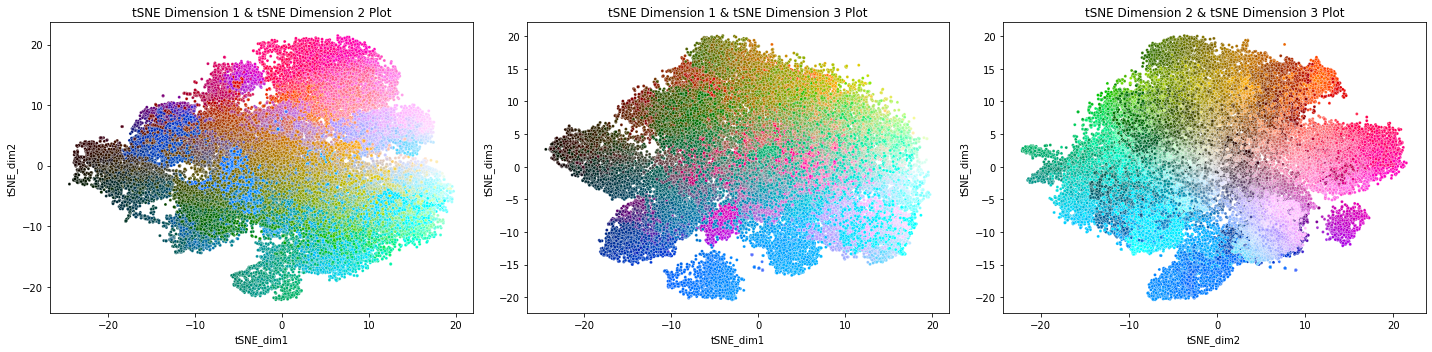

In [230]:
# tSNE dataframe to visualize in 2D and 3D

tsne_df = pd.DataFrame(data=tsne_results[:],columns=["tSNE_dim1","tSNE_dim2","tSNE_dim3"])
tsne_df['pixel_ID'] = train_ID_pixels
tsne_df['L_Component'] = tsne_results[:,0]
tsne_df['A_Component'] = tsne_results[:,1]
tsne_df['B_Component'] = tsne_results[:,2]

LAB_mapping = [ tsne_df['L_Component'] , tsne_df['A_Component'] , tsne_df['B_Component'] ]
LAB_colors = np.asarray(LAB_mapping)
LAB_colors = LAB_colors.swapaxes(0,1)

L = rescale(LAB_colors[:,0]) * 100
A = rescale_AB(LAB_colors[:,1])
B = rescale_AB(LAB_colors[:,2])
LAB_colors = np.asarray( [ L , A, B ] )
LAB_colors = LAB_colors.swapaxes(0,1)
RGB_colors = lab2rgb(LAB_colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# sns.set(rc = {'figure.figsize':(15,8)})
marker_size = 9

sns.scatterplot(
    ax = axes[0],
    x = "tSNE_dim1", y="tSNE_dim2",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[0].set_title("tSNE Dimension 1 & tSNE Dimension 2 Plot")

sns.scatterplot(
    ax = axes[1],
    x = "tSNE_dim1", y="tSNE_dim3",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[1].set_title("tSNE Dimension 1 & tSNE Dimension 3 Plot")

sns.scatterplot(
    ax = axes[2],
    x = "tSNE_dim2", y="tSNE_dim3",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[2].set_title("tSNE Dimension 2 & tSNE Dimension 3 Plot")



plt.tight_layout()
plt.show()



In [296]:
# tSNE visualized in 3D
%matplotlib qt
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'],
    zs= tsne_df['tSNE_dim3'],
    c = RGB_colors,
    s = 5,
    alpha = 1,
)
# ax.set_xlim(-40,40)
# ax.set_ylim(-40,40)
# ax.set_zlim(-40,40)
ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')
ax.set_title("tSNE Colored map")

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 20 , azim = -160) 
plt.tight_layout()

In [297]:
kmeans_8 , kmeans_7, kmeans_6, kmeans_5 = KMeans_results(tsne_results)

In [233]:
# kMeans tSNE
tsne_visualized_labels = kmeans_8.labels_
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = tsne_visualized_labels,
    cmap = cmapTSNE,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')
ax.set_title("tSNE Colored map for {} components".format(len(np.unique(tsne_visualized_labels))))


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

In [298]:
Clinical_data = ReadClinicalData(testPatient_ID , "ClinicalData.xlsx")
Clinical_data_full = pd.read_excel("ClinicalData.xlsx","Breast Cancer Clinical Data")

NonMetastasis: [3. 3. 0. 3. 1. 3. 0. 4.]
Metastasis: [6. 3. 8. 2. 4. 5. 6. 2.]


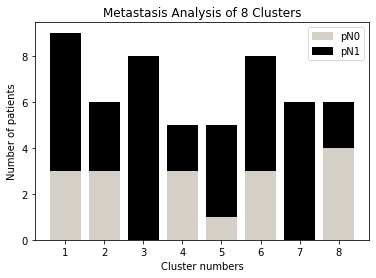

NonMetastasis: [3. 3. 1. 4. 3. 0. 0.]
Metastasis: [6. 3. 3. 6. 2. 9. 6.]


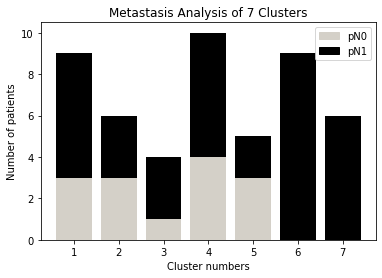

NonMetastasis: [2. 4. 1. 0. 3. 3.]
Metastasis: [9. 6. 4. 7. 2. 3.]


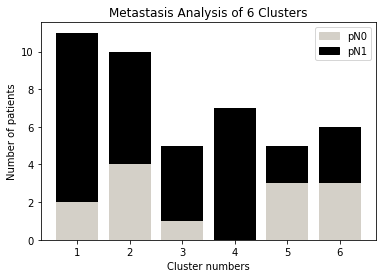

NonMetastasis: [2. 3. 3. 0. 4.]
Metastasis: [9. 3. 3. 7. 6.]


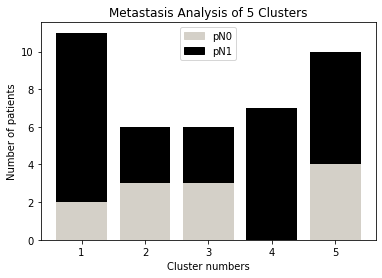

In [299]:
%matplotlib inline
# Returns Non-Metastasis and Metastasis clusters
state08, state18 = metastasis_status(kmeans_8.labels_, Clinical_data,train_ID_pixels)
state07, state17 = metastasis_status(kmeans_7.labels_, Clinical_data,train_ID_pixels)
state06, state16 = metastasis_status(kmeans_6.labels_, Clinical_data,train_ID_pixels)
state05, state15 = metastasis_status(kmeans_5.labels_, Clinical_data,train_ID_pixels)

# Plots bar plot of Non-Metastasis and Metastasis clusters
plot_metastasis_status(state08, state18)
plot_metastasis_status(state07, state17)
plot_metastasis_status(state06, state16)
plot_metastasis_status(state05, state15)

# Create dict to save kmeans results and select them later
kmeans_dict = {"8_Clusters": [kmeans_8.labels_,state08] , "7_Clusters": [kmeans_7.labels_,state07]  , "6_Clusters": [kmeans_6.labels_,state06] , "5_Clusters": [kmeans_5.labels_,state05] }

In [301]:
# Select the correct kmeans that shows best results from metastasis analysis, must have one fully metastasis cluster
selected_clusters_value = 6

# ----------------------------------------------------------------------------------

# Detect the fully metastasis cluster, select the correct kmeans that shows best results from metastasis analysis
labels = kmeans_dict[str(selected_clusters_value)+"_Clusters"][0]
selected_state = kmeans_dict[str(selected_clusters_value)+"_Clusters"][1]

fully_metastasis_cluster_label = 0
for cluster in selected_state:
    if not cluster: # Cluster list is empty, has no healthy patients, so it's fully metastasis cluster
        break # fully_metastasis_cluster_label now has the right label, exit loop
    
    fully_metastasis_cluster_label += 1

print("Fully metastasis cluster label's index is {} and it is cluster {}".format(fully_metastasis_cluster_label,fully_metastasis_cluster_label+1))

Fully metastasis cluster label's index is 3 and it is cluster 4


In [286]:
    # labels_count=len(np.unique(labels))
    # indices_of_patients = [[] for _ in range(len(Clinical_data))]
    # Sig_Cluster=[[] for _ in range(len(Clinical_data))]
    # Status=[[] for _ in range(len(Clinical_data))]

    # index = 0
    # for i in Clinical_data["Sample_ID"].tolist():
    #     Pixels_Samples = np.where(train_ID_pixels == i)[0]
    #     Patient_Labels = labels[Pixels_Samples]
        
    #     for cluster_label in range(labels_count):

    #         Patient_Pixels = Patient_Labels[Patient_Labels == cluster_label]

    #         if len(Patient_Pixels) >= int((1/labels_count * len(Patient_Labels))):

    #             if cluster_label not in [5,6]:
                    
    #                 Status[index].append(1)
    #             else:
    #                 Status[index].append(2)  


    #             Sig_Cluster[index].append(cluster_label)

    #     for j in range(0,len(Sig_Cluster[index])):
            
    #         indices=np.where(labels == Sig_Cluster[index][j])[0]

    #         # for element in indices:
    #         #     if element in Pixels_Samples:
                    
    #         #         indices_of_patients[i-1].append(element)

    #         indices_of_patients[index].extend(list(set(Pixels_Samples).intersection(indices)))
        
    #     index += 1
    
    # Final_Status=[]
    # for patient in Status:
    #     if 2 in patient:
    #         Final_Status.append(2)
    #     else:
    #         Final_Status.append(1)
    
    # Unique_IDs = Clinical_data["Sample_ID"].tolist()
    # Metastasis_Patients = [ ]
    # Average_protein_values = [ ]

    # for i in range(0,len(Unique_IDs)):
    #     Patient_MSI_values = train_data[indices_of_patients[i]]
    #     Metastasis_Patients.append(Patient_MSI_values)
    #     Average_protein_values.append(np.average(Metastasis_Patients[i], axis=0))
    
    # protein_dataframe = pd.DataFrame(Average_protein_values,columns=peak_list[:,0].astype(int))
    # protein_dataframe["Status"] = Final_Status
    # protein_dataframe.to_csv("BreastCancerAverageSpectrumValues.csv",index=False)

In [302]:
# Run R file in order to generate significant proteins using the csv file
protein_dataframe = SAM_Analysis(labels, Clinical_data, train_ID_pixels, fully_metastasis_cluster_label, train_data, peak_list)
protein_dataframe.to_csv("BreastCancerAverageSpectrumValues.csv",index=False)

In [303]:
#Need to read significant protein file outputted from R

SAM_protein = readSignificantProteins("significant_breast_proteins.json",delete=False)
SAM_protein = SAM_protein + readSignificantProteins("significant_breast_proteins_up.json",delete=False)

SAM_protein_indices=[]
for i in range(len(peak_list)):

    if peak_list[i][0] in SAM_protein:
        SAM_protein_indices.append(i)

train_scaled_selected_proteins_data = train_scaled_data[:,SAM_protein_indices]
test_scaled_selected_proteins_data = test_scaled_data[:,SAM_protein_indices]

train_selected_proteins_data = train_data[:,SAM_protein_indices]
test_selected_proteins_data = test_data[:,SAM_protein_indices]

train_labels = TargetLabelsCreation(labels , Clinical_data, train_ID_pixels, fully_metastasis_cluster_label)

In [279]:
    # # score values for metastasis and non_metastasis
    # Non_Metastasis = 1
    # Metastasis = 2

    # labels_count=len(np.unique(labels))
    # Status=[[] for _ in range(len(Clinical_data))]

    # index = 0
    # for i in Clinical_data["Sample_ID"]:

    #     Pixels_Samples = np.where(train_ID_pixels == i)[0]
    #     Patient_Labels = labels[Pixels_Samples]
        
    #     for cluster_label in range(labels_count):

    #         Patient_Pixels = Patient_Labels[Patient_Labels == cluster_label]

    #         if len(Patient_Pixels) >= int((1/labels_count * len(Patient_Labels))):

    #             if cluster_label not in [5,6]:
    #                 Status[index].append(1)
    #             else:
    #                 Status[index].append(2)  
    #     index+=1

    # Final_Status=[]
    # for patient in Status:
    #     if 2 in patient:
    #         Final_Status.append(2)
    #     else:
    #         Final_Status.append(1)

    # Target_labels=copy.deepcopy(labels)

    # index = 0
    # for i in Clinical_data["Sample_ID"]:
    #     if Final_Status[index] == 2:
    #         Pixels_Samples = np.where(train_ID_pixels == i)[0]
    #         Target_labels[Pixels_Samples] = Metastasis
    #     index+=1
        
    # Target_labels[Target_labels != Metastasis] = Non_Metastasis

    # train_labels = Target_labels

In [290]:
SAM_protein

[5171, 4965, 4999, 5067, 9929]

In [86]:
protein_ion = 8419
protein_index = protein_dataframe.columns.get_loc(protein_ion)

In [87]:
cmhot = plt.get_cmap("hot") #name of cmap u want from matplotlib

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = train_data[:,protein_index],
    cmap = cmhot,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

In [88]:
cmap_red_black = CreateColorMap(2,["red","black"])

fully_metastasis_labels = copy.deepcopy(labels)
fully_metastasis_indices = np.where(labels == fully_metastasis_cluster_label)[0]
fully_metastasis_labels[fully_metastasis_indices] = -1
fully_metastasis_labels[fully_metastasis_labels != -1] = 0

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = fully_metastasis_labels,
    cmap = cmap_red_black,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

In [304]:
# Test rbf at c = 0.1 , 1 , 10
# Test linear at c = 0.1 , 1 , 10
y_pred_SVM = SVM("rbf" , 0.1 , train_scaled_selected_proteins_data , train_labels , test_scaled_selected_proteins_data)

In [305]:
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred_SVM)
Surv_SVM = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 11.728738187882156 
Non-Metastasis probability : 88.27126181211784


In [316]:
y_pred_KNN = KNN(2 , train_scaled_selected_proteins_data, train_labels, test_scaled_selected_proteins_data)
# 2 , 4 , 8 , 6

In [317]:
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred_KNN)
Surv_KNN = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 12.896053362979435 
Non-Metastasis probability : 87.10394663702057


In [35]:
# Selected Gastric probabilities, select KNN or SVM results
Selected_model = Surv_SVM
Metastasis_prob = Selected_model[0]
Non_Metastasis_prob = Selected_model[1]

In [ ]:
# Run after model complete to save the result in the total results dataframe
total_results_dataframe_SVM = OutputDataframe(total_results_dataframe_SVM, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value, SAM_protein)

In [ ]:
total_results_dataframe_SVM

In [ ]:
total_results_dataframe_SVM.to_csv("total_breastCancer_results_SVM.csv" , index = False)

In [ ]:
Selected_model = Surv_KNN
Metastasis_prob = Selected_model[0]
Non_Metastasis_prob = Selected_model[1]

In [ ]:
total_results_dataframe_KNN = OutputDataframe(total_results_dataframe_KNN, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value, SAM_protein)

In [ ]:
total_results_dataframe_KNN

In [ ]:
total_results_dataframe_KNN.to_csv("total_breastCancer_results_KNN.csv" , index = False)